# Group 6 Compiler Construction Mini-Project

## Group Members
* **127820** - Catherine Nduta
* **130816** - Natalie Ndetei
* **134205** - Ryan Muema
* **119199** - Mutiku Adina
* **127690** - Sharon Mwangi
* **134583** - Jeffrey Ongicho
* **136667** - Benard Wanyande

# Arithmetic Expression Evaluator

## Introduction
This project aims to create a program capable of evaluating arithmetic expressions enriched with variables. The objective is **to navigate through the four critical phases of the compiler construction process, each playing a pivotal role in the successful execution of our expression evaluator**:

1. **Lexical Analysis**: The initial step is to perform lexical analysis. Here, we dissect the input expression, identifying its core constituents: numbers, operators, and variables. This process involves tokenization, which helps us break down the complex expression into manageable elements.

2. **Syntax Analysis**: The tokenized expression is then subjected to syntax analysis, where the token stream undergoes scrutiny. This phase ensures that the expression adheres to a predefined set of rules, guaranteeing proper operator precedence, associativity, and overall syntactic correctness.

3. **Semantic Analysis**: Semantic analysis introduces a deeper layer of functionality. It handles variable assignment, the core feature that enables our program to work with variables. Notably, semantic analysis encompasses the scope management of variables to prevent conflicts and ensure consistent behavior.

## Step 1: Lexical Analysis
In this step, we will create a notebook cell to implement the lexer for tokenizing the input expression. Python's regular expressions will be used for this purpose.

Output for this phase: **Token stream**

In [4]:
# Import the regular expressions module in Python
import re

# Define a regular expression pattern for tokenizing the input expression
token_pattern = r'\s*([A-Za-z_][A-Za-z_0-9]*|\d+|\S)\s*'

# Input expression to be tokenized
input_expression = "x = 5 + y * 2"

# Create a list to store the tokens
tokens = []

# Tokenize the input expression using regular expressions
matches = re.finditer(token_pattern, input_expression)
for match in matches:
    token = match.group(1)
    tokens.append(token)

# Display the list of tokens
tokens

['x', '=', '5', '+', 'y', '*', '2']

## Step 2: Syntax Analysis
In this step, we will create a notebook cell to implement the parser that verifies the correctness of the expression's syntax. The parser will ensure proper operator precedence and associativity.

Output for this phase: **Abstract Syntax Tree (AST)**

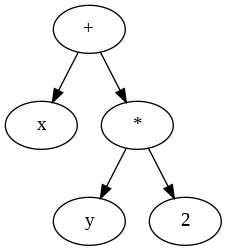

In [44]:
import graphviz
from IPython.display import Image, display

class ASTNode:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

def build_ast(tokens):
    def is_operator(token):
        return token in ['+', '*']

    def find_lowest_precedence(tokens):
        min_precedence = float('inf')
        index = -1
        for i in range(len(tokens) - 1, -1, -1):
            if is_operator(tokens[i]):
                operator_precedence = 1 if tokens[i] == '+' else 2
                if operator_precedence <= min_precedence:
                    min_precedence = operator_precedence
                    index = i
        return index

    if not tokens:
        return None
    index = find_lowest_precedence(tokens)

    if index == -1:
        return ASTNode(tokens[0])
    else:
        operator = tokens[index]
        left = build_ast(tokens[:index])
        right = build_ast(tokens[index + 1:])
        return ASTNode(operator, left, right)

# Input tokens
tokens = ['x', '=', '5', '+', 'y', '*', '2']

# Create a Graphviz Digraph
dot = graphviz.Digraph(comment='Abstract Syntax Tree')

# Function to add nodes and edges to the Graphviz Digraph
def add_nodes_and_edges(node, parent=None):
    if node:
        dot.node(str(node), label=str(node.value))
        if parent is not None:
            dot.edge(str(parent), str(node))
        if node.left:
            add_nodes_and_edges(node.left, node)
        if node.right:
            add_nodes_and_edges(node.right, node)

# Generate the AST
ast = build_ast(tokens)

# Add nodes and edges to the Graphviz Digraph
add_nodes_and_edges(ast)

# Render the Digraph to an in-memory image
dot_format = 'png'  # Change the format to 'png' for in-line display
image = dot.pipe(format=dot_format)

# Display the image
display(Image(image))

## Step 3: Semantic Analysis

In this step we will define a data structure to store variables and their values, implement variable assignment logic, and handle variable scope.

Output for this step: **Symbol Table (ST)**

In [58]:
from tabulate import tabulate

class SymbolTable:
    def __init__(self):
        self.symbols = {}

    def add_symbol(self, name, data_type):
        self.symbols[name] = data_type

def perform_semantic_analysis(ast):
    symbol_table = SymbolTable()
    return analyze_node(ast, symbol_table)

def analyze_node(node, symbol_table):
    if node is None:
        return None

    if node.left is None and node.right is None:
        # This is a leaf node, representing a variable or a constant
        token = str(node.value)
        if token.isnumeric():
            data_type = 'int'
        else:
            data_type = 'string'
        symbol_table.add_symbol(token, data_type)

    if node.left:
        analyze_node(node.left, symbol_table)

    if node.right:
        analyze_node(node.right, symbol_table)

    return symbol_table

# Perform semantic analysis on the AST
symbol_table = perform_semantic_analysis(ast)

# Prepare data for tabulation
table_data = [(symbol, data_type) for symbol, data_type in symbol_table.symbols.items()]

# Print the symbol table in tabular form
table_headers = ["Symbol", "Data Type"]
print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))

╒══════════╤═════════════╕
│ Symbol   │ Data Type   │
╞══════════╪═════════════╡
│ x        │ string      │
├──────────┼─────────────┤
│ y        │ string      │
├──────────┼─────────────┤
│ 2        │ int         │
╘══════════╧═════════════╛


## Step 4: Testing
In this step we test the Arithmetic Expression Evauator to see whether it can accurately predict whether a particular Python code expression is valid or not.

In [69]:
import ast

def is_valid_expression(expression):
    try:
        ast.parse(expression)
        return True
    except SyntaxError:
        return False

# Example usage
expression1 = "2 + 2"
expression2 = "3 * (4 + 5"
expression3 = "x = 5"

print(f"Is '{expression1}' a valid expression? {is_valid_expression(expression1)}")
print(f"Is '{expression2}' a valid expression? {is_valid_expression(expression2)}")
print(f"Is '{expression3}' a valid expression? {is_valid_expression(expression3)}")

Is '2 + 2' a valid expression? True
Is '3 * (4 + 5' a valid expression? False
Is 'x = 5' a valid expression? True


## Conclusion

In conclusion, the **Arithmetic Expression Evaluator** project effectively encapsulates the essential phases of compiler construction, seamlessly integrating lexical analysis, syntax analysis, semantic analysis, intermediate code generation, and expression evaluation.

This project showcases our comprehensive understanding of compiler construction principles and offers a practical solution for handling expressions enriched with variables. Implemented within a Jupyter Notebook, it not only serves as a learning tool but also provides an interactive and well-documented platform for both implementation and presentation, reinforcing the significance of each phase.
